# Polynomial Regression

### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Position_Salaries.csv")

In [2]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

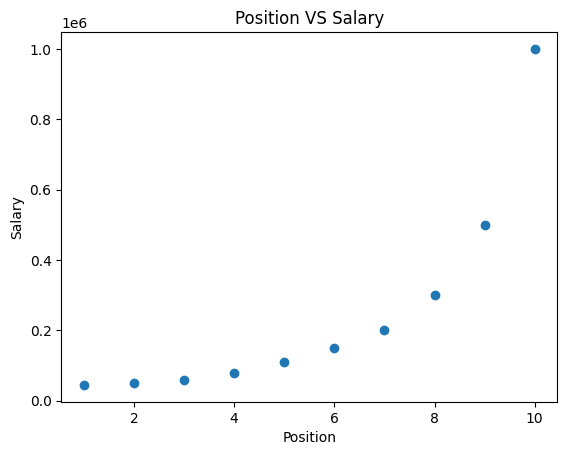

In [4]:
plt.scatter(X,y)
plt.title("Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

We don't have enough information to split the data into Train and Test data.

### Fitting Linear Regression Model
Just to compare its accuracy with Polynomial Regression

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

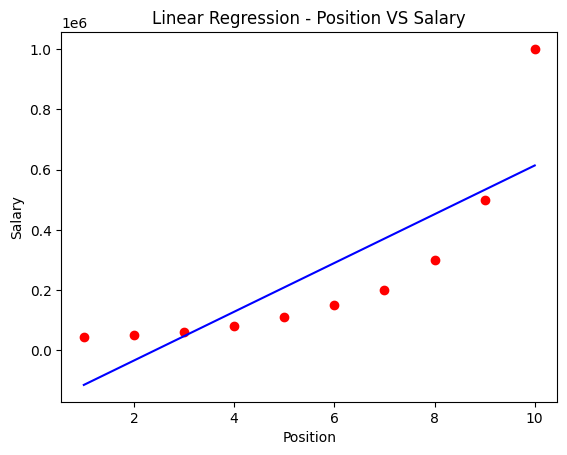

In [6]:
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Linear Regression - Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [7]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [8]:
accuracy = lin_reg.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 66.90412331929895 %


As you can see the accuracy is very low

### Fitting Polynomial Regression Model

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

Change the degree to get better accuracy

In [10]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

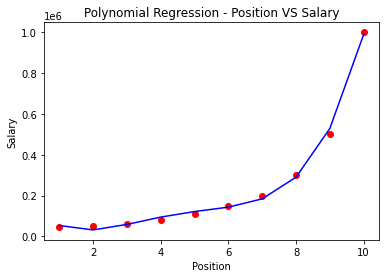

In [12]:
plt.scatter(X, y, color = "red")
plt.plot(X ,lin_reg2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Polynomial Regression - Position VS Salary")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [13]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

In [14]:
accuracy = lin_reg2.score(poly_reg.fit_transform(X),y)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 99.73922891706614 %


The accuracy is better than that of Linear Regression